# importing the necessary libraries

In [1]:
import numpy as np    #for numerical computation

import pandas as pd   #for read_csv, working with csv files
import email
import regex as re

import seaborn as sns
import matplotlib.pyplot as plt
#import plotly
%matplotlib inline

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

# Exploring the data

In [4]:
email_df = pd.read_csv("emails.csv")     #display the csv file

In [5]:
email_df.head()                                 
#check the first 5 columns

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [6]:
#check number of rows and columns

email_df.shape     #it contains 517401 rows and 2 columns

(517401, 2)

In [7]:
email_df.info()      #Consists of 2 columns- file and message

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   file     517401 non-null  object
 1   message  517401 non-null  object
dtypes: object(2)
memory usage: 7.9+ MB


In [8]:
#look at the file structure

email_df.loc[0]['file'].split("\n")     

#it consists of file name, file type, file number

['allen-p/_sent_mail/1.']

In [9]:
#look at the message structure

email_df.loc[0]['message'].split("\n")     

#It consists of message-id, date, from, to, subject, x-from, x-to, folder, and body

['Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>',
 'Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)',
 'From: phillip.allen@enron.com',
 'To: tim.belden@enron.com',
 'Subject: ',
 'Mime-Version: 1.0',
 'Content-Type: text/plain; charset=us-ascii',
 'Content-Transfer-Encoding: 7bit',
 'X-From: Phillip K Allen',
 'X-To: Tim Belden <Tim Belden/Enron@EnronXGate>',
 'X-cc: ',
 'X-bcc: ',
 "X-Folder: \\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail",
 'X-Origin: Allen-P',
 'X-FileName: pallen (Non-Privileged).pst',
 '',
 'Here is our forecast',
 '',
 ' ']

In [10]:
#check if there is null value

email_df.isnull().sum()

file       0
message    0
dtype: int64

In [11]:
#check if all values are unique

email_df.nunique()    

#therefore, there are no duplicate values in our dataset

file       517401
message    517401
dtype: int64

# Observation

- there is no null value
- the message column needs to be cleaned and divided into columns as Date, From, To, Subject, X-From, X-To, Body
- there are no duplicate values

# Extraction of relevant columns from the two columns

In [15]:
parsed_emails = [email.message_from_string(message) for message in email_df['message']]


In [16]:
email_df["Date"] = [email_message["Date"] for email_message in parsed_emails]

In [17]:
email_df["From"] = [email_message["From"] for email_message in parsed_emails]
email_df["To"] = [email_message["To"] for email_message in parsed_emails]
email_df["X-From"] = [email_message["X-From"] for email_message in parsed_emails]
email_df["X-To"] = [email_message["X-To"] for email_message in parsed_emails]
email_df["Subject"] = [email_message["Subject"] for email_message in parsed_emails]
email_df["Body"] = [email_message.get_payload() for email_message in parsed_emails]
email_df["X-Folder"] = [email_message["X-Folder"] for email_message in parsed_emails]
email_df['Employee'] = email_df['file'].str.split('/').str[0]

In [18]:
email_df.head()

,file,message,Date,From,To,X-From,X-To,Subject,Body,X-Folder,Employee
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,Here is our forecast\n\n,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",allen-p
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Re:,Traveling to have a business meeting takes the...,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",allen-p
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Phillip K Allen,Leah Van Arsdall,Re: test,test successful. way to go!!!,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,allen-p
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,Phillip K Allen,Randall L Gay,,"Randy,\n\n Can you send me a schedule of the s...",\Phillip_Allen_Dec2000\Notes Folders\'sent mail,allen-p
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Phillip K Allen,Greg Piper,Re: Hello,Let's shoot for Tuesday at 11:45.,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,allen-p


In [19]:
# Working with missing values

In [33]:
email_df.replace('', np.nan, inplace=True)

In [34]:
email_df.isnull().sum()

file            0
message         0
Date            0
From            0
To          21847
X-From         29
X-To         9153
Subject     19187
Body            0
X-Folder       29
Employee        0
dtype: int64

In [35]:
email_df = email_df.dropna(subset=['To', 'X-From', 'X-To', 'Subject', 'X-Folder'])

In [36]:
email_df.shape

(476725, 11)

In [37]:
email_df.isnull().sum()

file        0
message     0
Date        0
From        0
To          0
X-From      0
X-To        0
Subject     0
Body        0
X-Folder    0
Employee    0
dtype: int64

In [38]:
#parse the date col

email_df["Date"].head(3)

1     Fri, 4 May 2001 13:51:00 -0700 (PDT)
2    Wed, 18 Oct 2000 03:00:00 -0700 (PDT)
4    Thu, 31 Aug 2000 05:07:00 -0700 (PDT)
Name: Date, dtype: object

In [39]:
email_df["Date"] = pd.to_datetime(email_df['Date'], utc=True)

C:\Users\Mehardeep Kaur\AppData\Local\Temp\ipykernel_14744\2710967881.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  email_df["Date"] = pd.to_datetime(email_df['Date'], utc=True)


In [40]:
email_df["Date"].describe()

count                                 476725
mean     2001-02-21 01:18:30.657796480+00:00
min                1980-01-01 00:00:00+00:00
25%                2000-10-12 16:35:00+00:00
50%                2001-02-28 16:08:00+00:00
75%                2001-08-02 18:24:12+00:00
max                2044-01-04 22:48:58+00:00
Name: Date, dtype: object

In [41]:
email_df.head(4)

,file,message,Date,From,To,X-From,X-To,Subject,Body,X-Folder,Employee
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,2001-05-04 20:51:00+00:00,phillip.allen@enron.com,john.lavorato@enron.com,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Re:,Traveling to have a business meeting takes the...,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",allen-p
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,2000-10-18 10:00:00+00:00,phillip.allen@enron.com,leah.arsdall@enron.com,Phillip K Allen,Leah Van Arsdall,Re: test,test successful. way to go!!!,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,allen-p
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,2000-08-31 12:07:00+00:00,phillip.allen@enron.com,greg.piper@enron.com,Phillip K Allen,Greg Piper,Re: Hello,Let's shoot for Tuesday at 11:45.,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,allen-p
5,allen-p/_sent_mail/1002.,Message-ID: <30965995.1075863688265.JavaMail.e...,2000-08-31 11:17:00+00:00,phillip.allen@enron.com,greg.piper@enron.com,Phillip K Allen,Greg Piper,Re: Hello,"Greg,\n\n How about either next Tuesday or Thu...",\Phillip_Allen_Dec2000\Notes Folders\'sent mail,allen-p


In [43]:
email_df["Date"] = pd.to_datetime(email_df["Date"], utc=True)

In [44]:
email_df.describe()

,file,message,Date,From,To,X-From,X-To,Subject,Body,X-Folder,Employee
count,476725,476725,476725,476725,476725,476725,476725,476725,476725,476725,476725
unique,476725,476725,NaN,19477,57261,26474,70271,152894,231720,5099,150
top,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,NaN,kay.mann@enron.com,pete.davis@enron.com,Kay Mann,pete.davis@enron.com,RE:,We've updated the Merger Q&A document on our E...,\Kay_Mann_June2001_1\Notes Folders\All documents,kaminski-v
freq,1,1,NaN,16228,9147,15833,5334,6458,110,6483,26877
mean,NaN,NaN,2001-02-21 01:18:30.657796480+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1980-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2000-10-12 16:35:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2001-02-28 16:08:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2001-08-02 18:24:12+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,2044-01-04 22:48:58+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualization

- find corr
- find the unique
- find the highest message sent from someone/to someone
- compare the dates with years

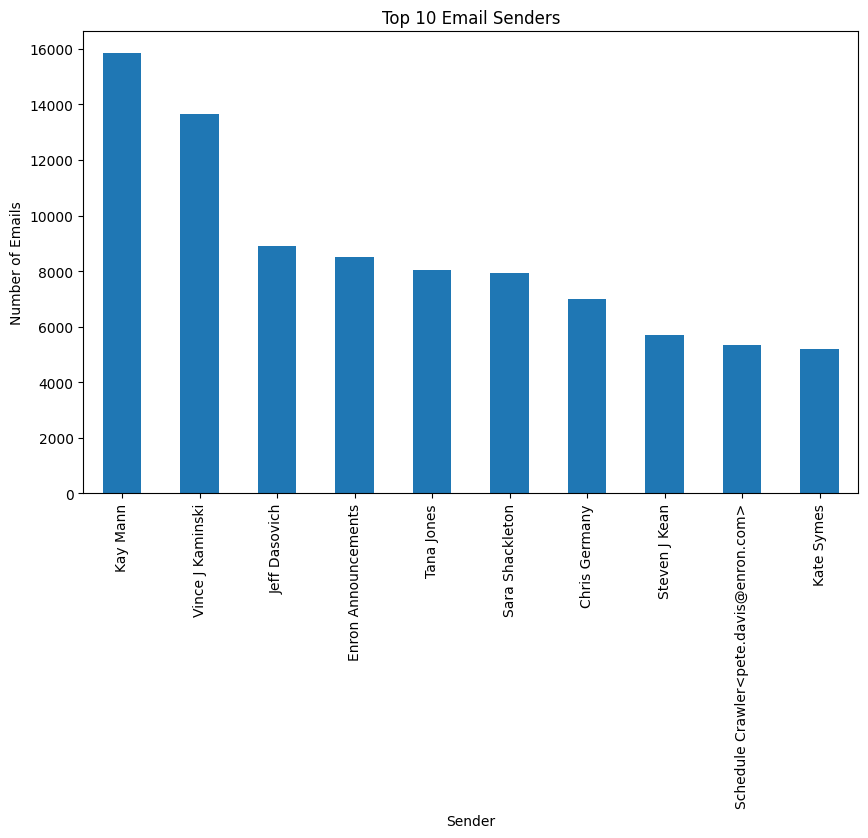

In [58]:
top_senders = email_df["X-From"].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_senders.plot(kind='bar')
plt.title('Top 10 Email Senders')
plt.xlabel('Sender')
plt.ylabel('Number of Emails')

plt.show()


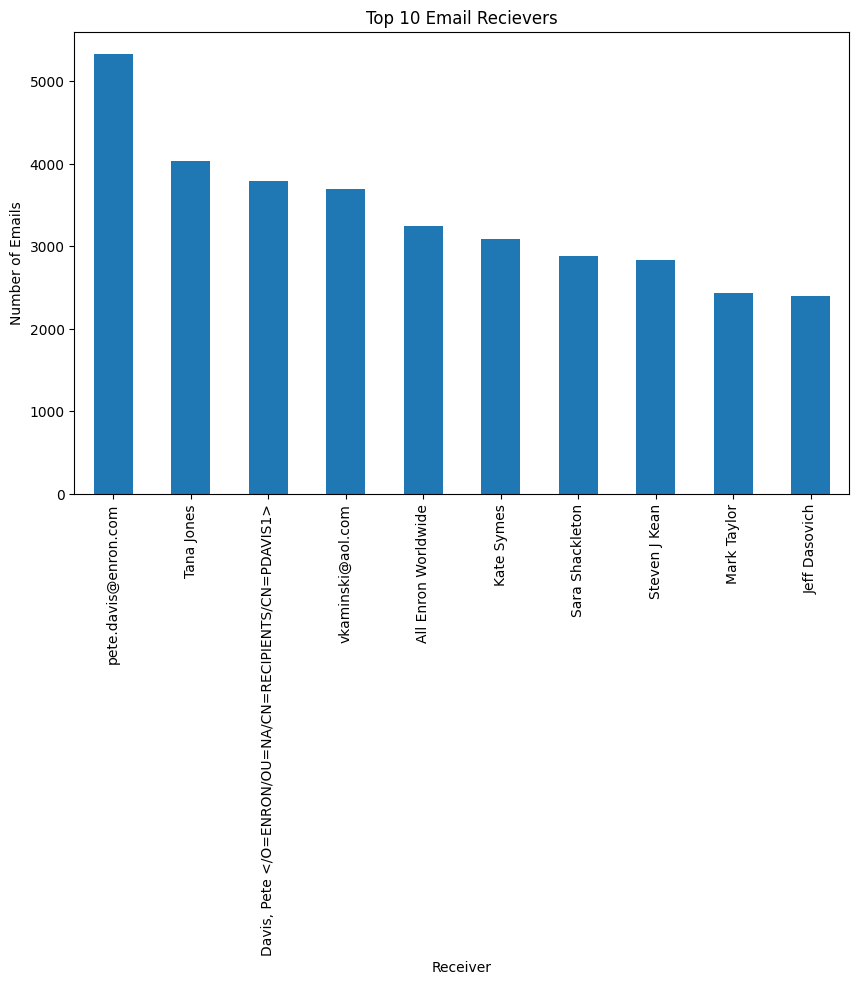

In [60]:
top_receivers = email_df["X-To"].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_receivers.plot(kind='bar')
plt.title('Top 10 Email Recievers')
plt.xlabel('Receiver')
plt.ylabel('Number of Emails')

plt.show()

In [64]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 476725 entries, 1 to 517400
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype              
---  ------    --------------   -----              
 0   file      476725 non-null  object             
 1   message   476725 non-null  object             
 2   Date      476725 non-null  datetime64[ns, UTC]
 3   From      476725 non-null  object             
 4   To        476725 non-null  object             
 5   X-From    476725 non-null  object             
 6   X-To      476725 non-null  object             
 7   Subject   476725 non-null  object             
 8   Body      476725 non-null  object             
 9   X-Folder  476725 non-null  object             
 10  Employee  476725 non-null  object             
dtypes: datetime64[ns, UTC](1), object(10)
memory usage: 43.6+ MB


# Data preprocessing and Cleaning

let's work with a sample of data

In [68]:
SAMPLE_SIZE=100_000

In [70]:
sample_df = email_df.sample(SAMPLE_SIZE, random_state=42)

In [72]:
sample_df.reset_index(drop=True, inplace=True)

In [74]:
sample_df

,file,message,Date,From,To,X-From,X-To,Subject,Body,X-Folder,Employee
0,jones-t/all_documents/10680.,Message-ID: <27540945.1075847340773.JavaMail.e...,2001-04-02 01:42:00+00:00,enron.announcements@enron.com,all.worldwide@enron.com,Enron Announcements,All Enron Worldwide,Anonymous Reporting Facilities,This is to remind you that various anonymous r...,\Tanya_Jones_June2001\Notes Folders\All documents,jones-t
1,schoolcraft-d/inbox/junk/630.,Message-ID: <6444944.1075860769149.JavaMail.ev...,2002-02-19 23:09:36+00:00,newsletter@rigzone.com,darrell.schoolcraft@enron.com,"""newsletter@rigzone.com"" <newsletter@rigzone.c...","Schoolcraft, Darrell </O=ENRON/OU=NA/CN=RECIPI...",RIGZONE Industry News,\n=09=09=09[IMAGE]=09=09\n=09Wednesday Februar...,"\Darrell_Schoolcraft_Mar2002\Schoolcraft, Darr...",schoolcraft-d
2,kean-s/discussion_threads/7108.,Message-ID: <27880801.1075850542938.JavaMail.e...,2001-06-29 12:54:00+00:00,pat.shortridge@enron.com,"mark.palmer@enron.com, linda.robertson@enron.c...",Pat Shortridge,"Mark Palmer, Linda Robertson, Richard Shapiro,...",very helpful website,http://www.rtumble.com/\n\nThe attached websit...,\Steven_Kean_Nov2001_4\Notes Folders\Discussio...,kean-s
3,shapiro-r/discussion_threads/267.,Message-ID: <537420.1075844232369.JavaMail.eva...,2001-04-10 07:54:00+00:00,mark.schroeder@enron.com,john.sherriff@enron.com,Mark Schroeder,John Sherriff,Re: Enron Europe Governtal & Regulatory Affair...,"1 I have left voice messages for Alfredo, Pau...",\Richard_Shapiro_June2001\Notes Folders\Discus...,shapiro-r
4,symes-k/sent/96.,Message-ID: <5353416.1075841881105.JavaMail.ev...,2000-11-17 10:55:00+00:00,kate.symes@enron.com,angela.cadena@enron.com,Kate Symes,Angela Cadena,Re: Hotdogs today,"You rock, Angela! Don't worry, I'll be my usua...",\kate symes 6-27-02\Notes Folders\Sent,symes-k
...,...,...,...,...,...,...,...,...,...,...,...
99995,beck-s/discussion_threads/1902.,Message-ID: <16336046.1075855854252.JavaMail.e...,2000-10-18 22:31:00+00:00,sally.beck@enron.com,richard.causey@enron.com,Sally Beck,Richard Causey,"Speaking Engagement - October 23, 2000",Thanks in advance for agreeing to speak at the...,\Sally_Beck_Dec2000\Notes Folders\Discussion t...,beck-s
99996,germany-c/sent_items/391.,Message-ID: <14991640.1075840517733.JavaMail.e...,2002-04-10 13:21:36+00:00,chris.germany@enron.com,ingrid.immer@williams.com,"Germany, Chris </O=ENRON/OU=NA/CN=RECIPIENTS/C...",Ingrid Immer (E-mail) <ingrid.immer@williams.com>,Boo,Our new assistant checked on paternity leave. ...,"\ExMerge - Germany, Chris\Sent Items",germany-c
99997,swerzbin-m/inbox/49.,Message-ID: <6322407.1075840034340.JavaMail.ev...,2002-01-15 02:02:26+00:00,jr..legal@enron.com,dl-ga-all_enron_worldwide2@enron.com,Legal - James Derrick Jr. </O=ENRON/OU=NA/CN=R...,DL-GA-all_enron_worldwide2 </O=ENRON/OU=NA/CN=...,Retention of Documents,"\nThis is to remind all employees that, as ear...","\ExMerge - Swerzbin, Mike\Inbox",swerzbin-m
99998,lavorato-j/powerwest/15.,Message-ID: <17814732.1075857732867.JavaMail.e...,2000-07-11 10:56:00+00:00,david.oxley@enron.com,john.lavorato@enron.com,David Oxley,John J Lavorato,Belden and Swerzbin,"John,\n\nSee below. \n---------------------- F...",\John_Lavorato_Dec2000\Notes Folders\Powerwest,lavorato-j


In [76]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype              
---  ------    --------------   -----              
 0   file      100000 non-null  object             
 1   message   100000 non-null  object             
 2   Date      100000 non-null  datetime64[ns, UTC]
 3   From      100000 non-null  object             
 4   To        100000 non-null  object             
 5   X-From    100000 non-null  object             
 6   X-To      100000 non-null  object             
 7   Subject   100000 non-null  object             
 8   Body      100000 non-null  object             
 9   X-Folder  100000 non-null  object             
 10  Employee  100000 non-null  object             
dtypes: datetime64[ns, UTC](1), object(10)
memory usage: 8.4+ MB


# TEXT PREPROCESSING

1. Lowercase
2. Tokenization
3. Stopword removal
4. Lemmatization

In [79]:
# create a micro sample dataset

In [81]:
#clean the data

stop = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # lowercase
    text = text.lower()
    
    # tokenization
    words = word_tokenize(text)
    
    # Remove stopwords and punctuation
    cleaned_words = [word for word in words if word not in stop and word not in string.punctuation]
    
    # Remove numbers
    cleaned_words = [word for word in cleaned_words if not re.match(r'\d+', word)]
    
    # Lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in cleaned_words]
    
    # Join words back into a single string
    cleaned_text = " ".join(lemmatized_words)
    
    return cleaned_text

# Apply the function to the DataFrame
sample_df["Cleaned_text"] = sample_df["Body"].apply(clean_text)

In [85]:
sample_df.head()

,file,message,Date,From,To,X-From,X-To,Subject,Body,X-Folder,Employee,Cleaned_text
0,jones-t/all_documents/10680.,Message-ID: <27540945.1075847340773.JavaMail.e...,2001-04-02 01:42:00+00:00,enron.announcements@enron.com,all.worldwide@enron.com,Enron Announcements,All Enron Worldwide,Anonymous Reporting Facilities,This is to remind you that various anonymous r...,\Tanya_Jones_June2001\Notes Folders\All documents,jones-t,remind various anonymous reporting facility ar...
1,schoolcraft-d/inbox/junk/630.,Message-ID: <6444944.1075860769149.JavaMail.ev...,2002-02-19 23:09:36+00:00,newsletter@rigzone.com,darrell.schoolcraft@enron.com,"""newsletter@rigzone.com"" <newsletter@rigzone.c...","Schoolcraft, Darrell </O=ENRON/OU=NA/CN=RECIPI...",RIGZONE Industry News,\n=09=09=09[IMAGE]=09=09\n=09Wednesday Februar...,"\Darrell_Schoolcraft_Mar2002\Schoolcraft, Darr...",schoolcraft-d,=09=09=09 image =09=09 =09wednesday february i...
2,kean-s/discussion_threads/7108.,Message-ID: <27880801.1075850542938.JavaMail.e...,2001-06-29 12:54:00+00:00,pat.shortridge@enron.com,"mark.palmer@enron.com, linda.robertson@enron.c...",Pat Shortridge,"Mark Palmer, Linda Robertson, Richard Shapiro,...",very helpful website,http://www.rtumble.com/\n\nThe attached websit...,\Steven_Kean_Nov2001_4\Notes Folders\Discussio...,kean-s,http //www.rtumble.com/ attached website terri...
3,shapiro-r/discussion_threads/267.,Message-ID: <537420.1075844232369.JavaMail.eva...,2001-04-10 07:54:00+00:00,mark.schroeder@enron.com,john.sherriff@enron.com,Mark Schroeder,John Sherriff,Re: Enron Europe Governtal & Regulatory Affair...,"1 I have left voice messages for Alfredo, Pau...",\Richard_Shapiro_June2001\Notes Folders\Discus...,shapiro-r,left voice message alfredo paul dawson paul he...
4,symes-k/sent/96.,Message-ID: <5353416.1075841881105.JavaMail.ev...,2000-11-17 10:55:00+00:00,kate.symes@enron.com,angela.cadena@enron.com,Kate Symes,Angela Cadena,Re: Hotdogs today,"You rock, Angela! Don't worry, I'll be my usua...",\kate symes 6-27-02\Notes Folders\Sent,symes-k,rock angela n't worry 'll usual quiet unassumi...


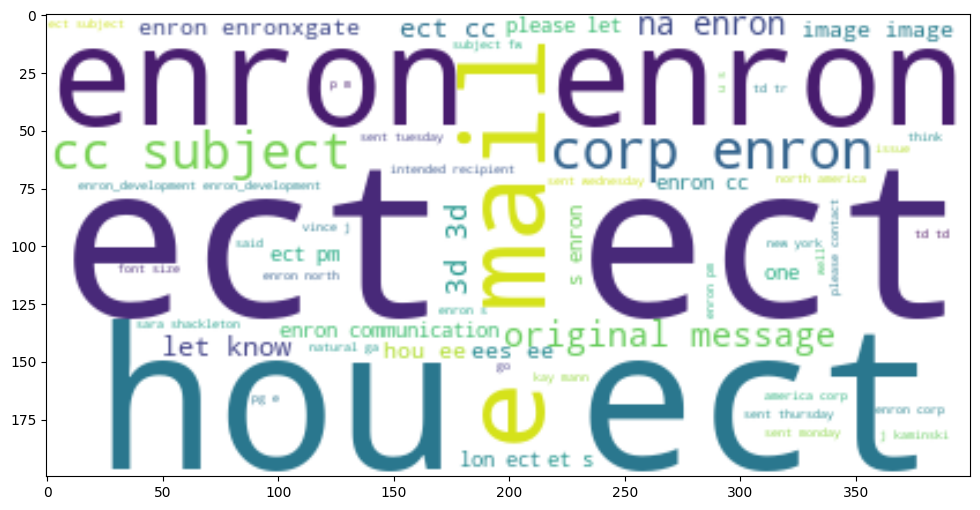

In [88]:
most_freq = " ".join(i for i in sample_df["Cleaned_text"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(most_freq)
plt.figure(figsize=(20,6))
plt.imshow(wordcloud, interpolation='bilinear')

plt.show()

# Text Vectorization

In [90]:
sample_vectorizer = TfidfVectorizer()

In [91]:
X = sample_vectorizer.fit_transform(sample_df.Cleaned_text) #learn the vocabulary of the document

In [92]:
sample_vectorizer.vocabulary_

{'remind': 213119,
 'various': 254199,
 'anonymous': 50773,
 'reporting': 213598,
 'facility': 115012,
 'are': 53500,
 '20': 9484,
 'available': 56381,
 'report': 213578,
 'violation': 255820,
 'company': 84072,
 'policy': 200832,
 'suspected': 237497,
 'criminal': 88303,
 'conduct': 84732,
 'officer': 189399,
 'employee': 108520,
 'agent': 44943,
 'enron': 109590,
 'relating': 212841,
 'th': 242305,
 'performance': 197165,
 'duty': 101670,
 'also': 48668,
 'question': 208291,
 'message': 173575,
 'comment': 83767,
 'suggestion': 236524,
 'may': 170348,
 'reported': 213592,
 'letter': 161620,
 'mail': 167634,
 'voice': 256381,
 'set': 225146,
 'forth': 119594,
 'describing': 94967,
 'or': 191622,
 'much': 179606,
 'detail': 95224,
 'possible': 201567,
 'allow': 48414,
 'an': 49815,
 'investigation': 144703,
 'matter': 170084,
 'sent': 224778,
 'confidential': 84841,
 'post': 201583,
 'office': 189388,
 'box': 67229,
 'compliance': 84282,
 'business': 71652,
 'affairs': 43962,
 'houston

# Clustering

In [94]:
model = KMeans(n_clusters=8, random_state=42)

In [96]:
model.fit(X)

KMeans(random_state=42)

In [97]:
sample_df["Cluster"] = model.labels_

In [98]:
count = sample_df["Cluster"].value_counts()
count

Cluster
4    61651
1    13407
7    10269
3     6222
0     3410
6     2449
5     1754
2      838
Name: count, dtype: int64

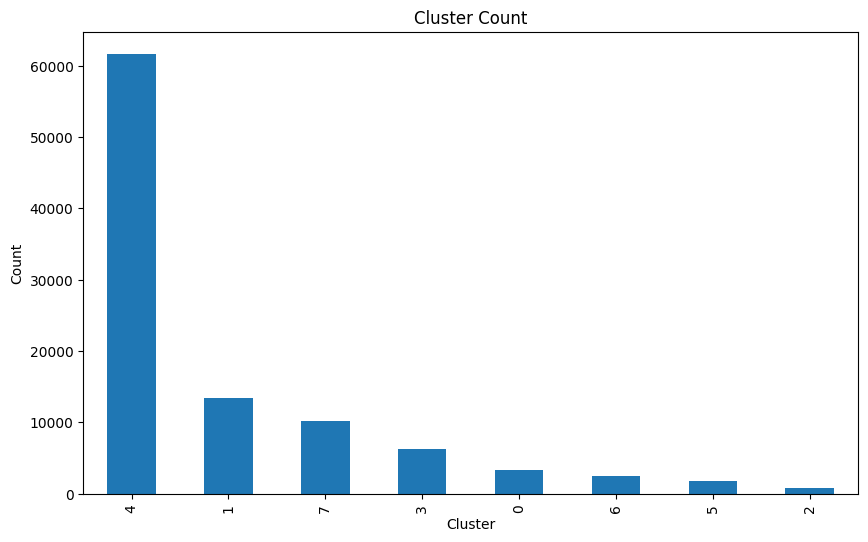

In [99]:
plt.figure(figsize=(10, 6))
count.plot(kind='bar')
plt.title('Cluster Count')
plt.xlabel('Cluster')
plt.ylabel('Count')

plt.show()

this is an exponential distribution

# Train-Test split

In [102]:
inputs = sample_vectorizer.transform(sample_df['Cleaned_text'])

In [103]:
inputs

<100000x276787 sparse matrix of type '<class 'numpy.float64'>'
	with 9104277 stored elements in Compressed Sparse Row format>

In [104]:
target = sample_df['Cluster']

In [105]:
target

0        6
1        2
2        1
3        6
4        4
        ..
99995    3
99996    4
99997    4
99998    0
99999    4
Name: Cluster, Length: 100000, dtype: int32

# Model Building with Logistic Regression

In [107]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

In [123]:
logreg = LogisticRegression(random_state=42, solver = 'liblinear', penalty = 'l1')

In [125]:
type(inputs)

scipy.sparse._csr.csr_matrix

In [127]:
logreg.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [128]:
y_pred = logreg.predict(X_test)

In [129]:
sample_df['Labels'] = logreg.predict(inputs)

In [130]:
sample_df.head()

,file,message,Date,From,To,X-From,X-To,Subject,Body,X-Folder,Employee,Cleaned_text,Cluster,Labels
0,jones-t/all_documents/10680.,Message-ID: <27540945.1075847340773.JavaMail.e...,2001-04-02 01:42:00+00:00,enron.announcements@enron.com,all.worldwide@enron.com,Enron Announcements,All Enron Worldwide,Anonymous Reporting Facilities,This is to remind you that various anonymous r...,\Tanya_Jones_June2001\Notes Folders\All documents,jones-t,remind various anonymous reporting facility ar...,6,6
1,schoolcraft-d/inbox/junk/630.,Message-ID: <6444944.1075860769149.JavaMail.ev...,2002-02-19 23:09:36+00:00,newsletter@rigzone.com,darrell.schoolcraft@enron.com,"""newsletter@rigzone.com"" <newsletter@rigzone.c...","Schoolcraft, Darrell </O=ENRON/OU=NA/CN=RECIPI...",RIGZONE Industry News,\n=09=09=09[IMAGE]=09=09\n=09Wednesday Februar...,"\Darrell_Schoolcraft_Mar2002\Schoolcraft, Darr...",schoolcraft-d,=09=09=09 image =09=09 =09wednesday february i...,2,2
2,kean-s/discussion_threads/7108.,Message-ID: <27880801.1075850542938.JavaMail.e...,2001-06-29 12:54:00+00:00,pat.shortridge@enron.com,"mark.palmer@enron.com, linda.robertson@enron.c...",Pat Shortridge,"Mark Palmer, Linda Robertson, Richard Shapiro,...",very helpful website,http://www.rtumble.com/\n\nThe attached websit...,\Steven_Kean_Nov2001_4\Notes Folders\Discussio...,kean-s,http //www.rtumble.com/ attached website terri...,1,1
3,shapiro-r/discussion_threads/267.,Message-ID: <537420.1075844232369.JavaMail.eva...,2001-04-10 07:54:00+00:00,mark.schroeder@enron.com,john.sherriff@enron.com,Mark Schroeder,John Sherriff,Re: Enron Europe Governtal & Regulatory Affair...,"1 I have left voice messages for Alfredo, Pau...",\Richard_Shapiro_June2001\Notes Folders\Discus...,shapiro-r,left voice message alfredo paul dawson paul he...,6,6
4,symes-k/sent/96.,Message-ID: <5353416.1075841881105.JavaMail.ev...,2000-11-17 10:55:00+00:00,kate.symes@enron.com,angela.cadena@enron.com,Kate Symes,Angela Cadena,Re: Hotdogs today,"You rock, Angela! Don't worry, I'll be my usua...",\kate symes 6-27-02\Notes Folders\Sent,symes-k,rock angela n't worry 'll usual quiet unassumi...,4,4


# Interpreting the model accuracy

In [133]:
accuracy = accuracy_score(y_test, y_pred)

In [134]:
accuracy

0.9716

In [135]:
sample_df.Cluster.value_counts()

Cluster
4    61651
1    13407
7    10269
3     6222
0     3410
6     2449
5     1754
2      838
Name: count, dtype: int64

In [136]:
sample_df.Labels.value_counts()

Labels
4    62056
1    13327
7    10431
3     5878
0     3259
6     2471
5     1749
2      829
Name: count, dtype: int64

# Prediction from whole dataset

# cluster 1 = Communication or Correspondence

In [191]:
sample_df[(sample_df["Cluster"]==1)]["Body"][32]

'I know a couple of their lawyers from a prior transaction (Doug Turner and \ntheir GC, whose name I\'ve now forgotten).  Don\'t know who they will have on \nthis one.\n\nI\'m off to the Astros, but would like to visit with you tomorrow, if you will \nbe around.\n\nThanks,\n\nKay\n\n\n\n\n"Culotta, Kenneth" <KCulotta@KSLAW.com> on 05/22/2001 05:36:41 PM\nTo: "Keffer, John" <JKeffer@KSLAW.com>, "\'C. Kay Mann (E-mail)\'" \n<Kay.Mann@enron.com>\ncc:  \n\nSubject: RE: Tampa Electric\n\nKay\n\nI\'m looking forward to working with you on this.  I wonder who opposing\ninhouse counsel is at TECO?\n\nKSC\n\n> -----Original Message-----\n> From:   Keffer, John \n> Sent:   Tuesday, May 22, 2001 5:17 PM\n> To:   C. Kay Mann (E-mail)\n> Cc:   Culotta, Kenneth\n> Subject:   Tampa Electric\n> \n> Kay-we have no conflict with Tampa Electric.  Gracias\n\n\n\n                    Confidentiality Notice\nThis message is being sent by or on behalf of a lawyer.  It is intended \nexclusively for the individ

# CLUSTER 2 = Financial Markets Updates and Alerts

In [226]:
sample_df[(sample_df["Cluster"]==2)]["Body"][99043]

'\n   [IMAGE]        [IMAGE]        [IMAGE] [IMAGE] Super  Shoe Savings Widths  for Men  Basketball  Shoe Sale  Gear  up for Running [IMAGE] [IMAGE]   [IMAGE]       [IMAGE] [IMAGE] House of  Hoops Hats  Large  Sizes & Widths [IMAGE] [IMAGE]   [IMAGE]     \t[IMAGE]\t [IMAGE] [IMAGE] \t\n\n\n\t  \t\n\tThis message was sent by footlocker.com Click here  if you prefer not to receive future e-mail from footlocker.com Click here  to view our permission marketing policy. \t\n\n[IMAGE]'

# CLUSTER 3 = Business Correspondence and Legal Matters

In [245]:
sample_df[(sample_df["Cluster"]==3)]["Cleaned_text"][99944]

"check steve lorraine whether call lawyer n't want call ferc except last resort thanks df susan scott pm drew fossum/et s/enron enron cc subject red cedar drew -- hh leave new lawyer 's name let 's discus whether phone howard safely plane costa rica meantime lorraine already asked meaders case howard cited said 'd consult lawyer order 'm sure answer `` '' snooping around ferc starting sound like good idea 'm uncharted territory wo n't discussing drew fossum bill cordes/et s/enron enron steven harris/et s/enron enron lorraine lindberg/et s/enron enron cc susan scott/et s/enron enron subject red cedar ugh 'll keep working angle new attorney show deck think susan done much done howard h. know red cedar facility look like i.e many mile line big diameter line compression etc howard must read old case gotten spooked facilites n't gathering modified primary function test 'm sure think signing transport contract u make situation worse seems conclusion steve bill ca n't nudge red cedar 's manag

# CLUSTER 4 = Internal Communications and Operational Updates

In [258]:
sample_df[(sample_df["Cluster"]==4)]["Cleaned_text"][12]

'dear power outage database customer attached find excel document outage contained within rescheduled outage daily delivery still contain outage addition excel document dbf file formatted like daily delivery receive nightly enable load data regular database question please let know thanks greg elliott iir inc. x outage industrialinfo.com information contained e-mail legally privileged confidential information intended use individual entity named hereby notified dissemination distribution copy e-mail unauthorized entity strictly prohibited received e-mail error please delete outage.dbf'

# CLUSTER 5

In [263]:
sample_df[(sample_df["Cluster"]==5)]["Body"]

14       \n\nStart Date: 1/22/02; HourAhead hour: 21;  ...
92       \n\nStart Date: 10/9/01; HourAhead hour: 24;  ...
123      Start Date: 4/13/01; HourAhead hour: 5;  No an...
183      Start Date: 4/17/01; HourAhead hour: 10;  No a...
264      \n\nStart Date: 1/8/02; HourAhead hour: 15;  N...
                               ...                        
99579    Start Date: 4/25/01; HourAhead hour: 10;  No a...
99607    \n\nStart Date: 1/4/02; HourAhead hour: 15;  N...
99772    \n\nStart Date: 2/6/02; HourAhead hour: 5;  No...
99856    \n\nStart Date: 1/23/02; HourAhead hour: 17;  ...
99880    \n\nStart Date: 2/3/02; HourAhead hour: 24;  N...
Name: Body, Length: 1754, dtype: object

In [465]:
sample_df[(sample_df["Cluster"]==1)]["Body"][355471]

'GCCA Crawfish and rip-off raffle & over-priced print extravaganza tonight at approx\n6-6:30pm.  Pig and I and ?? and ?? will be there to be overserved and underfed.\nI\'ve got my checkbook and wobbly boot ready to go!!\n \nC.\n \n\n----- Original Message -----\nFrom: Fenner, Chet\nSent: Thursday, May 02, 2002 9:18 AM\nTo: \'Parks, Joe\'; Fenner, Chet; chad knipe; Brian Constantine; EriK Wollam; Brad Corrier; c.r.zander@att.net; lawfeder@msn.com\nSubject: RE: man night again?\n \nNothin\'.\n\n-----Original Message-----\nFrom: Parks, Joe [mailto:Joe.Parks@bridgeline.net]\nSent: Thursday, May 02, 2002 7:59 AM\nTo: Fenner, Chet; chad knipe; Brian Constantine; EriK Wollam; Brad Corrier; c.r.zander@att.net; lawfeder@msn.com\nSubject: RE: man night again?\n\n\nwhat are you guys talking about? \n\n-----Original Message-----\nFrom: Fenner, Chet [mailto:Chet_Fenner@bmc.com]\nSent: Thursday, May 02, 2002 6:43 AM\nTo: \'chad knipe\'; Fenner, Chet; Brian Constantine; EriK Wollam; Brad Corrier; c.r

In [463]:
sample_df[(sample_df["Cluster"]==1)]["Body"][124910]

"I'm trying to change the Receipt Meter on deal 235367 from meter 7126 to \nmeter 010902.  I'm not trying to change the Receipt Interconnect point, I'm \ntrying to change the Receipt Point (From).  I can't change it.  Whats up?"

# CLUSTER 1 = INquiry

In [473]:
sample_df[(sample_df["Cluster"]==2)]["Body"].head()

262434    <!doctype html public "-//w3c//dtd html 4.0 tr...
174479    \n                                            ...
499786    <! >\n<! >\n<! ATTENTION!>\n<! You are reading...
15398     <!doctype html public "-//w3c//dtd html 4.0 tr...
174147      \n\n\t\n\n\t\n\n\n\n\t\n\n\t\n\n\t\n\n\t\n\n...
Name: Body, dtype: object

In [479]:
sample_df[(sample_df["Cluster"]==2)]["Body"][262434]

'<!doctype html public "-//w3c//dtd html 4.0 transitional//en"><html><HEAD>\n<!--\n\n\nYou are receiving these e-reports because you have signed up for\nCBS SportsLine.com Fantasy Football.  The default format for these\nreports is HTML, however if you are reading this text your\nmail reader is not displaying it as HTML.  To change to\ntext mode, or to customize, reschedule, or turn off these\nreports please to to the URL below:\n\nhttp://football222.fantasy.sportsline.com/mp/options-ereports?league=bige01&owner=78977.7\n\n\n\n\n\n-->\n\n<BASE HREF="http://football222.fantasy.sportsline.com/mp/">\n</HEAD><BODY TEXT="#00000" ALINK="#ffff00" LINK="#0000ff" VLINK="#0000ff" BGCOLOR=#000099><CENTER><TABLE BORDER=0 WIDTH=716 CELLPADDING=0 CELLSPACING=0><TR><TD><A HREF=http://www.sportsline.com/links/6/1/163/sffer1113th.cgi><IMG BORDER=0 SRC=http://images.commissioner.com/images/splash/football/SPLN_mgmt_ereport_header.gif></A></TD></TR><TR><TD><TABLE WIDTH=100% CELLPADDING=10 CELLSPACING=0 B

In [481]:
sample_df[(sample_df["Cluster"]==2)]["Body"][174479]

'\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            \n<HTML>                                                                                                                                                                                                                                                                                                 

In [483]:
sample_df[(sample_df["Cluster"]==2)]["Body"][15398]


'<!doctype html public "-//w3c//dtd html 4.0 transitional//en"><html><HEAD>\n<!--\n\n\nYou are receiving these e-reports because you have signed up for\nCBS SportsLine.com Fantasy Football.  The default format for these\nreports is HTML, however if you are reading this text your\nmail reader is not displaying it as HTML.  To change to\ntext mode, or to customize, reschedule, or turn off these\nreports please to to the URL below:\n\nhttp://football294.fantasy.sportsline.com/mp/options-ereports?league=kourn&owner=53402\n\n\n\n\n\n-->\n\n<BASE HREF="http://football294.fantasy.sportsline.com/mp/">\n</HEAD><BODY TEXT="#00000" ALINK="#ffff00" LINK="#0000ff" VLINK="#0000ff" BGCOLOR=#000099><CENTER><TABLE BORDER=0 WIDTH=716 CELLPADDING=0 CELLSPACING=0><TR><TD><A HREF=http://www.sportsline.com/links/6/1/163/sffer1225th.cgi><IMG BORDER=0 SRC=http://images.commissioner.com/images/splash/football/SPLN_mgmt_ereport_header.gif></A></TD></TR><TR><TD><TABLE WIDTH=100% CELLPADDING=10 CELLSPACING=0 BORD

In [485]:
sample_df[(sample_df["Cluster"]==2)]["Body"][499786]

'<! >\n<! >\n<! ATTENTION!>\n<! You are reading this message because your mail reader cannot display HTML.>\n<! If you would prefer to receive text messages from now on,>\n<! click the link below or copy it into a web browser.>\n<! \nhttp://208.50.155.100/ClickAction?func=S_TurnOffHtml&partname=bwbwol&uid=62891954\n> \n<! >\n<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/loose.dtd">\n<html>\n\n<!--\n*****************************\nWelcome to Business Week Online\'s Insider, a free service of Business Week Online. If you can read this message but the rest of the E-mail contains strange characters, your E-mail program is not capable of reading HTML mail. You can use your Web browser to read Business Week Online\'s Insider at http://www.businessweek.com/insider/insider.htm.  If you no longer wish to receive this newsletter, instructions for unsubscribing are included at the end of this message.\n******************************\n-->\n<head>\n<T

# CLUSTER 2 = Promotional/advertisment

In [492]:
sample_df[(sample_df["Cluster"]==4)]["Body"].head()

229872    Please see the following articles:\n\nSac Bee,...
260177    Enron: A Wake-Up Call\nThe Wall Street Journal...
58035     Please see the following articles:\n\nSac Bee,...
61781     Please see the following articles:\n\nSac Bee,...
243167    Please see the following articles:\n\nSac Bee,...
Name: Body, dtype: object

In [494]:
sample_df[(sample_df["Cluster"]==4)]["Body"][229872]

'Please see the following articles:\n\nSac Bee, Thurs, 4/5:  "Conservation bills hit snag: Provisions added to=20\nshield farmers from\n blackouts irritate Senate leaders and delay passage of an overall package.=\n"\n\nSac Bee, Thurs, 4/5:  "Democrats urge U.S. price controls"\n\nSan Diego Union, Thurs, 4/5: "California governor prepares to address state=\n=20\non energy"=20\n\nSan Diego Union, Thurs, 4/5:  "State gets $4.1 billion infusion"\n\nSan Diego Union, Thurs, 4/5:  "All California hospitals exempted from=20\nblackouts"\n\nSan Diego Union, Thurs, 4/5:  "Quick fix proposed for power problems"\n\nLA Times, Thurs, 4/5:  "Treasurer Urges Disclosure of Power Cost"\n\nLA Times, Thurs, 4/5:  "House GOP Moves to Draft Plan to Give the West Summ=\ner=20\nEnergy Aid"\n\nLA Times, Thurs, 4/5:  "California\'s Electricity Woes Power Up Northwest"\n\nSF Chron, Thurs, 4/5: "Davis Campaign Losing Steam=20\nEnergy crisis generates possible challengers for governor in 2002 "\n\nSF Chron, Thurs, 

In [496]:
sample_df[(sample_df["Cluster"]==4)]["Body"][260177]

'Enron: A Wake-Up Call\nThe Wall Street Journal, 12/04/01\nFall of a Power Giant: Dynegy Hits Back at Enron With Lawsuit --- Claim Is =\nThat Failed Merger Entitles Concern to Get Northern Natural Gas\nThe Wall Street Journal, 12/04/01\nEnron Secures $1.5 Billion in New Financing --- J.P. Morgan, Citigroup Pact=\n Is First Step; Now, Lifeline Is Sought for Trading Unit\nThe Wall Street Journal, 12/04/01\nFall of a Power Giant: Burst of Chapter 11 Filings Marks Big Year for the B=\nankruptcy Bar\nThe Wall Street Journal, 12/04/01\nFall of a Power Giant: Now Is the Time For Creditors to Vie Against Each Ot=\nher\nThe Wall Street Journal, 12/04/01\nAuditor Andersen Is Added To Enron 401(k) Lawsuit\nThe Wall Street Journal, 12/04/01\nStadium Jinx: What To Call Enron Field? `Enron Folds,\' Maybe --- Firms That=\n Put Their Names On Arenas Hit Hard Times; Former Trans World Dome\nThe Wall Street Journal, 12/04/01\nAs KPN Prepares to Sell New Shares, Investors Remain Lukewarm Toward Dutch =\n

In [498]:
sample_df[(sample_df["Cluster"]==4)]["Body"][58035]

'Please see the following articles:\n\nSac Bee, Mon, 5/14:  "Energy crisis creates cadre of tattletales"\n\nSac Bee, Mon, 5/14:  "Dan Walters: Lawyers and business still have=20\nplenty of energy for their battle"=20\n\nSac Bee, Mon, 5/14:  "Utilities are headed down troubling path:=20\nThe expansion frenzy may eventually lead to consolidation into a\nfew super-giant energy companies for all of the United States,=20\nCanada and Mexico"                                 (Editorial)\n\nSD Union, Sun, 5/13:  "Boom Days on the Plains"\n\nSD Union, Sun, 5/13:  "Summer blackout forecasts still hazy"\n\nSD Union, Sun, 5/13:  "Energy companies controlled market,\nstate panel claims"\n\nLA Times, Mon, 5/14:  "Communities Fighting $270-Million Power Line"\n\nLA Times, Sun, 5/13:  "Bush Tax Incentives Fuel Plan on Energy"\n\nSF Chron, Mon, 5/14:  "State buffer on blackouts near limit=20\nProgram that lets big businesses curb energy use almost exhausted "\n\nSF Chron (AP), Mon, 5/14:  "Natural gas g

In [500]:
sample_df[(sample_df["Cluster"]==4)]["Body"][61781]

'Please see the following articles:\n\nSac Bee, Thurs, 7/12: Enron files suit in contempt bid\nSac Bee, Thurs, 7/12: Davis\' refund plan faces a tough road: Several expert=\ns=20\nsay it\'s unlikely the FERC will buy the state\'s figures\nSac Bee, Thurs, 7/12: Energy Digtest: UC, CSU, Enron extend contract\nSac Bee, Thurs, 7/12: Energy consultants failed to file disclosures, Jones=\n=20\nsays\nSac Bee, Thurs, 7/12: Fudging at FERC: Feds must define \'just\' energy=20\ncharges  (Editorial)\nSD Union, Thurs, 7/12: Big customers want to shop around -- and there\'s the=\n=20\nrub=20\nSD Union, Thurs, 7/12: Senate panel, energy firm fighting tough\nSD Union, Thurs, 7/12: Energy firm scraps plans for plant in Chula Vista=20\nSD Union, Thurs, 7/12: Governor tells FERC to be fair and then some\nSD Union, Thurs, 7/12: Enron Corp. sues to block Senate from forcing docume=\nnt=20\nrelease\nSD Union, Thurs, 7/12: Regulators want broad, regional power markets=20\nLA Times, Thurs, 7/12: Huntington L

In [502]:
sample_df[(sample_df["Cluster"]==4)]["Body"][243167]

'Please see the following articles:\n\nSac Bee, Tues, 5/1:  "$18 billion power tab projected: An immediate=20\noutcry greets Davis\' plan for state energy purchases through June 2002"\n\nSac Bee, Tues, 5/1:  "PUC seeks to retain PG&E control"\n\nSac Bee, Tues, 5/1:  "Legislators propose tax on energy profits"\n\nSac Bee, Tues, 5/1:  "Dan Walters: Davis finally generates an energy plan,=\n=20\nbut will it work?"\n\nSac Bee, Tues, 5/1:  "Soaring energy bills hurt eateries: Many restaurants =\nin=20\ncapital area,=20\ndespite good patronage, expect to raise menu prices"\n\nSac Bee, Mon, 4/30:  "Empowering the public                 (Editorial)\nObstacles keep cities out of energy"\n\nSac Bee, Tues, 5/1:  "Daniel Weintraub: An energy trader says it\'s time to=\n=20\nlimit profits"   (Editorial)\n\nLA Times, Tues, 5/1:  "Power Companies Step Up Lobbying"\n\nLA Times, Tues, 5/1:  "Power Marketer Ordered by FERC to Refund $8 Million"\n\nLA Times, Tues, 5/1:  "Davis Turns to Bankruptcy Court f

# CLUSTER 4 = NEWS

In [505]:
sample_df[(sample_df["Cluster"]==5)]["Body"].head()

153190    If you cannot read today's e-Journal, please v...
73994     =09=09?=09\n?=09VentureWire\n=09Thursday, May ...
503148    =20\nRegister/Subscribe\nHome\n=09\n=09\n=09Ge...
74133     =09=09?=09\n?=09VentureWire\n=09Friday, May 25...
74262     =09=09?=09\n?=09VentureWire\n=09Wednesday, May...
Name: Body, dtype: object

In [507]:
sample_df[(sample_df["Cluster"]==5)]["Body"][153190]

'If you cannot read today\'s e-Journal, please visit this link:?=20\nhttp://www.michbar.org/e-journal/060401.html Or to receive a plain text=20\nversion, please send an e-mail to lyris@lists.michbar.org? In the body,=20\ntype:? unsubscribe ejournal and on the next line type:? subscribe=20\nejournal-text=20\n?\n\n\n[IMAGE]\n\n[IMAGE]\n\nAd 1\n\n[IMAGE]\n\n[IMAGE]\n\n[IMAGE]\n\n[IMAGE]\n\n[IMAGE]\n\nThe  e-Journal is available to members of the State Bar of Michigan at no=\n=20\nadditional  charge thanks in part to the generous support of our advertiser=\ns.=20\nPlease  be sure to support these State Bar partners and visit their Interne=\nt=20\nsites  frequently for information about their products and services.  =09?=\n=09\n=09=09\n=09=09\n=09=09\n=09=09[IMAGE]\n=09=09\n=09=09\n=09=09\n=09=09\n=09=09\n=09=09State  Bar of Michigan e-Journal for Monday, June 4, 2001\n=09=09\n=09=09\n=09=09\n=09=09\n=09=09\n=09=09\n=09=09\n=09=09\n=09=09\n=09=09\n=09=09\n=09=09\n=09=09\n=09=09\n=09=09\n=09

In [516]:
sample_df[(sample_df["Cluster"]==5)]["Cleaned_text"][73994]

"=09=09 =09 =09VentureWire =09Thursday May 31 2001=09=09 =09CONTENTS COMPANIES INVESTORS ADVERTISE TELL FRIEND=09VentureW= ire Index =09=09'VentureWire =09=09today 686.5 -1.87 =09 =09=09 =09=09 =09=09top story =09=09 =09=09 =01=07 Insight Capital Closes Fourth Fund 740 Million =09=09 =01=07 Whitney Co . Spin International Offices =09=09 =01=07 Rho Ventures Closes Fund IV 435 Million =09=09 =01=07 Fabless Semiconductor Firm Quake Raises 30M Round Two =09=09=20 =09=09 =09=09TODAY 'S FEATURES=20 =09=09INVESTOR STRATEGY =09=09Millennium Focus New Investments =09=09By Amanda Briggs =09=09After completing two new investment year Millennium Technology= =20 Ventures plan spend time next couple quarter focusing= =20 new deal =09=09UPCOMING EVENTS =09=09July 31 New York City =09=09Financial Services Outlook =09=09 =09=09Over 750 million invested private equity deal fi= nancial=20 service sector source VentureWire age liquidation preferenc= e=20 provision retroactive repricings 's strong performa

In [511]:
sample_df[(sample_df["Cluster"]==5)]["Body"][74133]

'=09=09?=09\n?=09VentureWire\n=09Friday, May 25, 2001=09=09?\n?=09CONTENTS | COMPANIES | INVESTORS | ADVERTISE | TELL A FRIEND=09VentureW=\nire Index\n=09=09\'VentureWire\n=09=09today: 754.4 ? +2.50%=09?\n? =09=09Note to Readers: VentureWire will be taking a break for Memorial Da=\ny.=20\n=09=09The next issue will be Tuesday, May 29.\n=09=09\n=09=09\n=09=09top stories=20\n=09=09\n=09=09 =01=07 CyberSafe Lays Off 50% Due to Decreased Sales\n=09=09 =01=07 BlueLight CEO Mark H. Goldstein Steps Down\n=09=09 =01=07 SubmitOrder Raises $40 Million, Replaces CEO\n=09=09 =01=07 Optical Networking Firm Kestrel Reduces Staff by 16%\n=09=09\n=09=09\n=09=09TODAY\'S FEATURES=20\n=09=09Bowman Capital Says P.E. Activity Not Affected by Fund Close\n=09=09By Suzanne Travers\n=09=09The decision by Bowman Capital, which invests in public and private=\n=20\ntechnology companies through hedge funds and a crossover fund, to shut down=\n=20\nits $1.75 billion large-cap technology fund will not affect the firm

In [513]:
sample_df[(sample_df["Cluster"]==5)]["Cleaned_text"][74262]

'=09=09?=09\n?=09VentureWire\n=09Wednesday, May 23, 2001=09=09?\n?=09CONTENTS | COMPANIES | INVESTORS | ADVERTISE | TELL A FRIEND=09VentureW=\nire Index\n=09=09\'VentureWire\n=09=09today: 736.2 ? -0.55%=09?\n? =09=09\n=09=09\n=09=09top stories\n=09=09\n=09=09 =01=07 Thomas Weisel Closes Early-Stage Fund at $255M\n=09=09 =01=07 Asera Names Former Tivoli Chief as New President & CEO\n=09=09 =01=07 Groove Networks Cuts 8%; Will Target Larger Clients=20\n=09=09=01=07 VantagePoint Forms $150M New York Fund\n=09=09\n=09=09\n=09=09TODAY\'S FEATURES=20\n=09=09Sun Cuts Investment Size, Looks to Earlier Stage Deals\n=09=09By Matthew Sheahan\n=09=09Sun Microsystems Venture & Strategic Investment fund has seen a drama=\ntic drop=20\nin its average investment size, Brian Sutphin, vice president of strategic=\n=20\ndevelopment, told VentureWire. more>>\n=09=09UPCOMING EVENTS=20\n=09=09June 5-6: San Francisco\n=09=09 Mobile Outlook 2001\n=09=09\n=09=09George Davis, vice chairman and president of Aeth